### Assignment on Iris Data set for Vehicular Technology on Classification

This dataset contains measurements of three different Iris flower species: Setosa, Versicolor, and Virginica. Each flower sample is described by four features:

Sepal Length

Sepal Width

Petal Length

Petal Width

### Lets Beign

In [6]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import warnings 
# from future.warnings('ignore')

import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Spatial Visualizations'''
import folium
import folium.plugins

### Importing Iris Dataset

In [7]:
# Read the dataset
data = pd.read_csv("Iris.csv")

In [8]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.tail(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# Checking for missing values in my data 
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### As can be seen from our data inspection, there is no missing on NaN values in our dataset

<Axes: xlabel='count', ylabel='Species'>

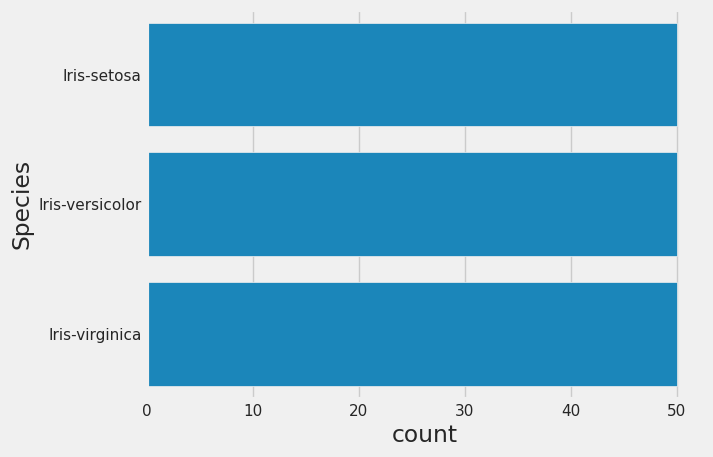

In [14]:
# making a count plot for the species of flowers
sns.countplot(data['Species'])

### From the above we can see that there are equal number of flowers species

In [ ]:
# To confirm the different species of flowers:
np.unique(data['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##### The species are in String values or Text so we have to change them to numerical values so we can train our model with it. 

##### So we have to apply sklearn preprocessing technique on our data

In [17]:
#string to numeric value
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()                                                                                     


In [18]:
new_data = data.copy()

In [19]:
new_data['Species']=le.fit_transform(new_data['Species'])
new_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


<Axes: >

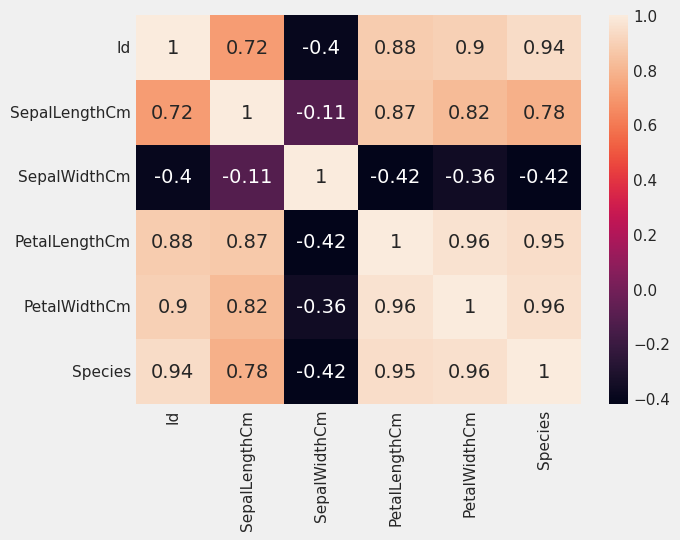

In [20]:
corr=new_data.corr()
sns.heatmap(new_data.corr(), annot=True)

### Splitting the Dataset

In [21]:
from sklearn.model_selection import train_test_split



In [22]:
# We put our data into the right variables and partition them

X=new_data.drop(columns=['Species'])
y=new_data['Species']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

### KNN - K Nearest Neighbours

In [23]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()

In [24]:
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Lets check our our model did. 

In [25]:
knn_model.score(X_test, y_test)

1.0

Our model got a perfect score of 100%. 

This is not overfitting because of the type of dataset we have 

### Why is the Accuracy 100%?


While achieving 100% accuracy can seem suspicious at first, in this case it is not due to overfitting. Here's why:

The Iris dataset is well-structured and balanced.

We used Stratified K-Fold Cross Validation, and our model performed perfectly on every fold.

So there is minimal noise in the dataset, and the class boundaries are very clear.

This makes the Iris dataset a perfect starting point to experiment with basic classification models.

### For Decision Tree Classification:

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [27]:
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
print("accuracy:", dt_model.score(X_test,y_test)*100 )

accuracy: 97.77777777777777
